In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import glob

In [3]:
data = []

In [4]:
for f in glob.glob("*metrics.pkl"):
    with open(f,"rb") as filename:
        print(f)
        a = pickle.load(filename)
        data.append(np.array(a))

prose_metrics.pkl
paper_metrics.pkl
esm_metrics.pkl


In [5]:
a

AUC           0.755625
Accuracy      0.773333
Recall        0.595000
Precision     0.708032
F1            0.627313
Round        49.500000
dtype: float64

In [6]:
test = pd.DataFrame(data)
test["Features"] = ["PROSE","Seq","ESM-2"]

In [7]:
test.columns = ["AUC","Accuracy","Recall","Precision","F1","Round","Features"]

In [8]:
test

,AUC,Accuracy,Recall,Precision,F1,Round,Features
0,0.772639,0.764444,0.643333,0.673135,0.636769,24.5,PROSE
1,0.757708,0.775556,0.646667,0.694506,0.646936,49.5,Seq
2,0.755625,0.773333,0.595000,0.708032,0.627313,49.5,ESM-2


In [9]:
stddata = []
for f in glob.glob("*metrics_std.pkl"):
    with open(f,"rb") as filename:
        print(f)
        a = pickle.load(filename)
        stddata.append(np.array(a))
test_std = pd.DataFrame(stddata)
test_std["Features"] = ["PROSE","Seq","ESM-2"]
test_std.columns = ["AUC","Accuracy","Recall","Precision","F1","Round","Features"]

esm_metrics_std.pkl
prose_metrics_std.pkl
paper_metrics_std.pkl


In [10]:

from matplotlib import font_manager
import matplotlib.ticker as ticker

#set up font importing
font_path = '/home/anhtn/fonts/Helvetica'
font_files = font_manager.findSystemFonts(fontpaths=font_path)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

def figure_formatting(): # make the plot look xmgrace-esque
    font = {'size': 16,'family': 'sans-serif'} #
    plt.rcParams['font.sans-serif'] = ['Helvetica']
    plt.rc('font', **font)
    plt.rcParams['axes.linewidth'] = 2.0
    plt.rcParams['xtick.major.size'] = 10
    plt.rcParams['xtick.minor.size'] = 5
    plt.rcParams['xtick.major.width'] = 2.0
    plt.rcParams['xtick.minor.width'] = 2.0
    plt.rcParams['ytick.major.size'] = 10
    plt.rcParams['ytick.minor.size'] = 5
    plt.rcParams['ytick.major.width'] = 2.0
    plt.rcParams['ytick.minor.width'] = 2.0
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    plt.rcParams['mathtext.default'] = 'regular'
    plt.rcParams['legend.fancybox'] = False # no rounded legend box
import datetime

Text(0, 0.5, 'Accuracy')

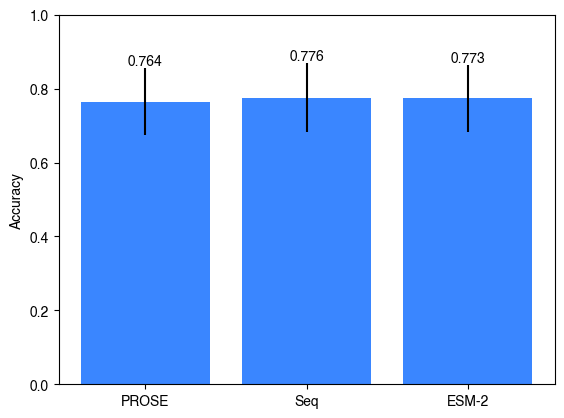

In [11]:
fig, ax = plt.subplots()
bars = ax.bar(test["Features"],test["Accuracy"],yerr=test_std["Accuracy"],color="#3a86ff")
ax.bar_label(bars, fmt='{:.3}')
figure_formatting()
plt.ylim([0,1])
plt.ylabel("Accuracy")

Text(0, 0.5, 'Precision')

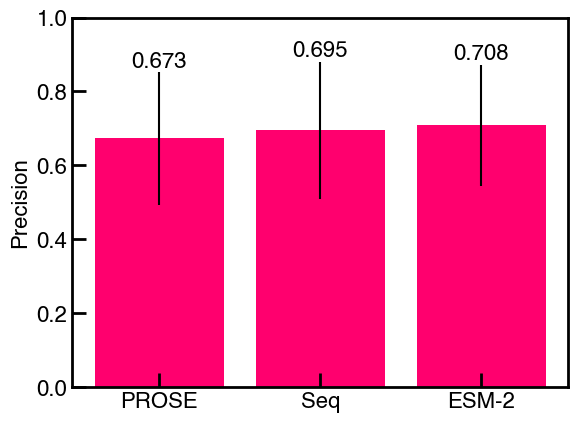

In [12]:
fig, ax = plt.subplots()
bars = ax.bar(test["Features"],test["Precision"],yerr=test_std["Precision"],color="#ff006e")
ax.bar_label(bars, fmt='{:.3}')
figure_formatting()
plt.ylim([0,1])
plt.ylabel("Precision")

Text(0, 0.5, 'AUC')

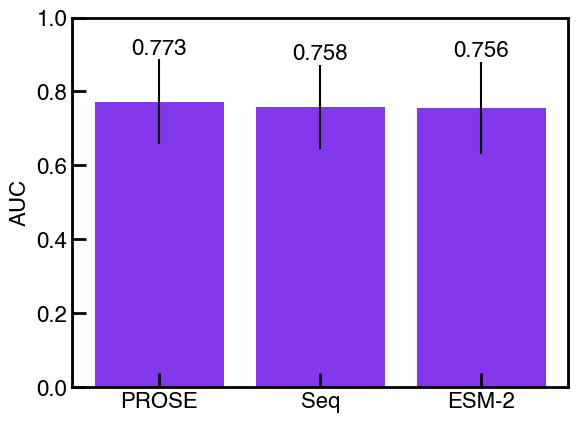

In [15]:
fig, ax = plt.subplots()
bars = ax.bar(test["Features"],test["AUC"],yerr=test_std["AUC"],color="#8338ec")
ax.bar_label(bars, fmt='{:.3}')
figure_formatting()
plt.ylim([0,1])
plt.ylabel("AUC")

Text(0, 0.5, 'Recall')

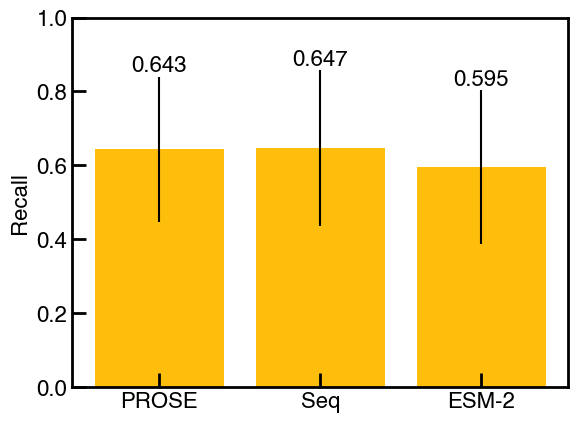

In [16]:
fig, ax = plt.subplots()
bars = ax.bar(test["Features"],test["Recall"],yerr=test_std["Recall"],color="#ffbe0b")
ax.bar_label(bars, fmt='{:.3}')
figure_formatting()
plt.ylim([0,1])
plt.ylabel("Recall")